<h1><center>Car Emissions</center></h1>

This dataset contains car emissions data for UK, which includes over 5,000 vehicles and their Emissions of August 2017.

![sales](https://www.syft.com/wp-content/uploads/2015/09/car-exhaust-iStock_000022408994Large-e1510525603349.jpg)

[source](https://www.kaggle.com/dananos/car-emissions-data)

# Our Goal in Steps:
## 1- Read the data and fetch it include:
   ###   - Fetch the head of data
   ###   - Discribe the data
   ###   - See more info about it
   ###   - See the types of the data

## 2- Clean and Preprocess on the dataset include:
   ###   - Drop the rows only if all of the values in the row are missing:
   ###   - See how many nulls we have in the columns:
   ###   - Drop uneeded columns that will not effect the emission rate
   ###   - Drop clomuns with nulls more than 60% but if we need some of it we will do a replacements
   ###   - Replace some nulls values with means or common values
   ###   - Enode some catagorial features if we need 
   ###   - Drop the rows only if all of the values in the row are missing:

## 3- what insights can we get from it ? using machine learrning ^_^ includes:
   ###   - Define which is your prediction target
   ###   - Define the train and test datasets
   ###   - Evaluate the R square
   ###   - Choose the ML algorthim
   ###   - Compare predtion results with the test dataset

# ------------------------------------------------STEP 1----------------------------------------------------

# Read the data and fetch

In [409]:
# import first
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# change the style from the very beging
plt.style.use('ggplot')
%matplotlib inline

In [410]:
#houses = pd.read_csv('F:\\Python_Projects\\Jupyter Notebook Projects\\Panads_matplotlib_bokeh\\datasets\\kc_house_data.csv')
emission = pd.read_csv('Car_emission.csv', encoding='windows-1252')
emission.head()

,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),...,Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,ALFA ROMEO,"MiTo Series 3, September 2016 Onwards",1.3 JTDm-2 95 bhp,M5,1248.0,Diesel,NaN,NaN,NaN,NaN,...,67.0,100.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,"1 Series 3-door F21, From September 2012",116d ED Plus 16'' tyres,M6,1496.0,Diesel,NaN,NaN,NaN,NaN,...,37.0,66.0,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BMW,"1 Series 5-door F20, From September 2011",116d ED Plus 16'' tyres,M6,1496.0,Diesel,NaN,NaN,NaN,NaN,...,37.0,66.0,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CITROEN,C4,BlueHDi 100 S&S,M5,1560.0,Diesel,NaN,NaN,NaN,NaN,...,55.0,74.0,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CITROEN,C4 Cactus,BlueHDi 100 S&S ETG6,AMT6,1560.0,Diesel,NaN,NaN,NaN,NaN,...,40.0,53.0,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 34 columns):
Manufacturer                             5118 non-null object
Model                                    5118 non-null object
Description                              5118 non-null object
Transmission                             5086 non-null object
Engine Capacity                          5088 non-null float64
Fuel Type                                5118 non-null object
Electric energy consumption Miles/kWh    81 non-null float64
wh/km                                    81 non-null float64
Maximum range (Km)                       81 non-null float64
Maximum range (Miles)                    81 non-null float64
Metric Urban (Cold)                      5037 non-null float64
Metric Extra-Urban                       5037 non-null float64
Metric Combined                          5088 non-null float64
Imperial Urban (Cold)                    5037 non-null float64
Imperial Extra-Urban    

In [412]:
emission.dtypes

Manufacturer                              object
Model                                     object
Description                               object
Transmission                              object
Engine Capacity                          float64
Fuel Type                                 object
Electric energy consumption Miles/kWh    float64
wh/km                                    float64
Maximum range (Km)                       float64
Maximum range (Miles)                    float64
Metric Urban (Cold)                      float64
Metric Extra-Urban                       float64
Metric Combined                          float64
Imperial Urban (Cold)                    float64
Imperial Extra-Urban                     float64
Imperial Combined                        float64
CO2 g/km                                   int64
Fuel Cost 12000 Miles                     object
Electricity cost                          object
Total cost / 12000 miles                  object
Euro Standard       

In [413]:
emission.describe()

,Engine Capacity,Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),Metric Urban (Cold),Metric Extra-Urban,Metric Combined,Imperial Urban (Cold),Imperial Extra-Urban,...,Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
count,5088.000000,81.000000,81.000000,81.000000,81.000000,5037.000000,5037.000000,5088.000000,5037.000000,5037.000000,...,5088.000000,2582.000000,2589.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1986.814465,8.002469,137.864198,169.580247,105.246914,6.905182,4.805579,5.544929,45.362220,61.687314,...,37.200865,79.331526,0.316748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,806.608051,12.046514,54.757135,184.336368,114.566087,2.760090,1.214175,1.776506,12.862403,12.615114,...,21.062978,22.137153,0.340874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,647.000000,2.300000,11.000000,30.000000,18.000000,0.000000,0.000000,0.600000,0.000000,0.000000,...,1.000000,19.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1499.000000,3.400000,117.000000,39.000000,24.000000,5.200000,4.000000,4.400000,36.700000,53.300000,...,22.000000,67.000000,0.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1968.000000,4.700000,132.000000,50.000000,31.000000,6.100000,4.500000,5.100000,46.300000,62.800000,...,35.000000,79.000000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1998.000000,5.300000,185.000000,280.000000,174.000000,7.700000,5.300000,6.100000,54.300000,70.600000,...,51.000000,93.000000,0.490000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6752.000000,56.500000,269.000000,632.000000,393.000000,25.600000,12.100000,17.000000,97.400000,104.600000,...,726.000000,154.000000,3.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ------------------------------------------------STEP 2----------------------------------------------------

# Cleaning and preprocessing:

### First we Will drop the rows only if all of the values in the row are missing:

In [414]:
emission.dropna(how = 'all',inplace = True)

In [415]:
#lets see which have null values
emission.isna().sum()

Manufacturer                                0
Model                                       0
Description                                 0
Transmission                               32
Engine Capacity                            30
Fuel Type                                   0
Electric energy consumption Miles/kWh    5037
wh/km                                    5037
Maximum range (Km)                       5037
Maximum range (Miles)                    5037
Metric Urban (Cold)                        81
Metric Extra-Urban                         81
Metric Combined                            30
Imperial Urban (Cold)                      81
Imperial Extra-Urban                       81
Imperial Combined                          30
CO2 g/km                                    0
Fuel Cost 12000 Miles                      30
Electricity cost                         5037
Total cost / 12000 miles                    0
Euro Standard                               0
Noise Level dB(A)                 

## Handling the missing data
### Drop uneeded colmuns with full null values:

In [416]:
clean_dataset = emission
clean_dataset = clean_dataset.drop(['Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32',
                                   'Unnamed: 33'], axis=1)

In [417]:
# but we still need to hundle the rest nulls values by droping or replace:
clean_dataset.isna().sum()

Manufacturer                                0
Model                                       0
Description                                 0
Transmission                               32
Engine Capacity                            30
Fuel Type                                   0
Electric energy consumption Miles/kWh    5037
wh/km                                    5037
Maximum range (Km)                       5037
Maximum range (Miles)                    5037
Metric Urban (Cold)                        81
Metric Extra-Urban                         81
Metric Combined                            30
Imperial Urban (Cold)                      81
Imperial Extra-Urban                       81
Imperial Combined                          30
CO2 g/km                                    0
Fuel Cost 12000 Miles                      30
Electricity cost                         5037
Total cost / 12000 miles                    0
Euro Standard                               0
Noise Level dB(A)                 

In [418]:
clean_dataset.head()

,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),...,Fuel Cost 12000 Miles,Electricity cost,Total cost / 12000 miles,Euro Standard,Noise Level dB(A),Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km]
0,ALFA ROMEO,"MiTo Series 3, September 2016 Onwards",1.3 JTDm-2 95 bhp,M5,1248.0,Diesel,NaN,NaN,NaN,NaN,...,£807,NaN,£807,6,67.5,234.0,NaN,67.0,100.0,0.27
1,BMW,"1 Series 3-door F21, From September 2012",116d ED Plus 16'' tyres,M6,1496.0,Diesel,NaN,NaN,NaN,NaN,...,£807,NaN,£807,6,68.0,119.0,NaN,37.0,66.0,0.14
2,BMW,"1 Series 5-door F20, From September 2011",116d ED Plus 16'' tyres,M6,1496.0,Diesel,NaN,NaN,NaN,NaN,...,£807,NaN,£807,6,68.0,119.0,NaN,37.0,66.0,0.14
3,CITROEN,C4,BlueHDi 100 S&S,M5,1560.0,Diesel,NaN,NaN,NaN,NaN,...,£784,NaN,£784,6,68.8,272.0,NaN,55.0,74.0,0.42
4,CITROEN,C4 Cactus,BlueHDi 100 S&S ETG6,AMT6,1560.0,Diesel,NaN,NaN,NaN,NaN,...,£807,NaN,£807,6,69.2,185.0,NaN,40.0,53.0,0.03


In [419]:
clean_dataset = clean_dataset.drop(['Manufacturer','Model'], axis=1)

In [420]:
clean_dataset = clean_dataset.drop(['Description'], axis=1)

### Drop uneeded colmuns with full null values more than 60%:

In [421]:
clean_dataset = clean_dataset.loc[:, clean_dataset.isin([' ','NULL',0]).mean() < .6]
print (clean_dataset)

     Transmission  Engine Capacity      Fuel Type  \
0              M5           1248.0         Diesel   
1              M6           1496.0         Diesel   
2              M6           1496.0         Diesel   
3              M5           1560.0         Diesel   
4            AMT6           1560.0         Diesel   
...           ...              ...            ...   
5113        E-CVT           3456.0  Petrol Hybrid   
5114        E-CVT           3456.0  Petrol Hybrid   
5115           A7           3498.0  Petrol Hybrid   
5116        E-CVT           1998.0  Petrol Hybrid   
5117        E-CVT           1998.0  Petrol Hybrid   

      Electric energy consumption Miles/kWh  wh/km  Maximum range (Km)  \
0                                       NaN    NaN                 NaN   
1                                       NaN    NaN                 NaN   
2                                       NaN    NaN                 NaN   
3                                       NaN    NaN                 

In [422]:
clean_dataset = clean_dataset.drop(['Electric energy consumption Miles/kWh',
                                    'wh/km',
                                    'Maximum range (Km)'
                                    ,'Maximum range (Miles)',
                                    'Electricity cost',
                                    'THC Emissions [mg/km]'
                                    ,'THC + NOx Emissions [mg/km]',
                                    'Particulates [No.] [mg/km]'], axis=1)

### now we will see if there is dupilcation and remove them if we need it:

## as you can see below we dont need to remove any of them becuase cost can be duplicated in our case

In [423]:
clean_dataset.describe(include=['O'])

,Transmission,Fuel Type,Fuel Cost 12000 Miles,Total cost / 12000 miles
count,5086,5118,5088,5118
unique,48,8,237,268
top,M6,Diesel,"£1,021","£1,021"
freq,1615,2560,169,169


In [424]:
clean_dataset.head()

,Transmission,Engine Capacity,Fuel Type,Metric Urban (Cold),Metric Extra-Urban,Metric Combined,Imperial Urban (Cold),Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel Cost 12000 Miles,Total cost / 12000 miles,Euro Standard,Noise Level dB(A),Emissions CO [mg/km],Emissions NOx [mg/km]
0,M5,1248.0,Diesel,4.3,2.9,3.4,65.7,97.4,83.1,89,£807,£807,6,67.5,234.0,67.0
1,M6,1496.0,Diesel,3.9,3.1,3.4,72.4,91.1,83.1,89,£807,£807,6,68.0,119.0,37.0
2,M6,1496.0,Diesel,3.9,3.1,3.4,72.4,91.1,83.1,89,£807,£807,6,68.0,119.0,37.0
3,M5,1560.0,Diesel,3.7,3.1,3.3,76.3,91.1,85.6,86,£784,£784,6,68.8,272.0,55.0
4,AMT6,1560.0,Diesel,3.9,3.2,3.4,72.4,88.3,83.1,89,£807,£807,6,69.2,185.0,40.0


In [425]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5118 entries, 0 to 5117
Data columns (total 16 columns):
Transmission                5086 non-null object
Engine Capacity             5088 non-null float64
Fuel Type                   5118 non-null object
Metric Urban (Cold)         5037 non-null float64
Metric Extra-Urban          5037 non-null float64
Metric Combined             5088 non-null float64
Imperial Urban (Cold)       5037 non-null float64
Imperial Extra-Urban        5037 non-null float64
Imperial Combined           5088 non-null float64
CO2 g/km                    5118 non-null int64
Fuel Cost 12000 Miles       5088 non-null object
Total cost / 12000 miles    5118 non-null object
Euro Standard               5118 non-null int64
Noise Level dB(A)           5118 non-null float64
Emissions CO [mg/km]        5088 non-null float64
Emissions NOx [mg/km]       5088 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 679.7+ KB


### now for numirc nan values we will replace the needed columns with the mean values of there respictive columns  like manufacture , model and Description we dont need them for emission:

In [426]:
clean_dataset.iloc[:,[10,11]]

,Fuel Cost 12000 Miles,Total cost / 12000 miles
0,£807,£807
1,£807,£807
2,£807,£807
3,£784,£784
4,£807,£807
...,...,...
5113,"£1,505","£1,505"
5114,"£1,505","£1,505"
5115,"£1,577","£1,577"
5116,"£1,692","£1,692"


In [427]:
#convert object to string and remove the euro sign
clean_dataset['Fuel Cost 12000 Miles'] = clean_dataset['Fuel Cost 12000 Miles'].str.slice(1,len(clean_dataset['Fuel Cost 12000 Miles'])-1)
#convert the string with ',' to float first remove ',' then convert to float
clean_dataset['Fuel Cost 12000 Miles'] = clean_dataset['Fuel Cost 12000 Miles'].str.replace(",","").astype(float)

In [428]:
clean_dataset.iloc[:,[10,11]]

,Fuel Cost 12000 Miles,Total cost / 12000 miles
0,807.0,£807
1,807.0,£807
2,807.0,£807
3,784.0,£784
4,807.0,£807
...,...,...
5113,1505.0,"£1,505"
5114,1505.0,"£1,505"
5115,1577.0,"£1,577"
5116,1692.0,"£1,692"


### Do the same to Total cost / 12000 miles remove Euro sign then remove the ',' then convert it to float

In [429]:
#convert object to string and remove the euro sign
clean_dataset['Total cost / 12000 miles'] = clean_dataset['Total cost / 12000 miles'].str.slice(1,len(clean_dataset['Total cost / 12000 miles'])-1)
#convert the string with ',' to float first remove ',' then convert to float
clean_dataset['Total cost / 12000 miles'] = clean_dataset['Total cost / 12000 miles'].str.replace(",","").astype(float)

In [430]:
clean_dataset.iloc[:,[10,11]]

,Fuel Cost 12000 Miles,Total cost / 12000 miles
0,807.0,807.0
1,807.0,807.0
2,807.0,807.0
3,784.0,784.0
4,807.0,807.0
...,...,...
5113,1505.0,1505.0
5114,1505.0,1505.0
5115,1577.0,1577.0
5116,1692.0,1692.0


In [431]:
# convert cost objects to numirc
# Fuel Cost 12000 Miles                    
# Electricity cost                        
# Total cost / 12000 miles
#check nulls numirc
# but we still need to hundle the rest nulls values by droping or replace:
clean_dataset.isna().sum()

Transmission                32
Engine Capacity             30
Fuel Type                    0
Metric Urban (Cold)         81
Metric Extra-Urban          81
Metric Combined             30
Imperial Urban (Cold)       81
Imperial Extra-Urban        81
Imperial Combined           30
CO2 g/km                     0
Fuel Cost 12000 Miles       30
Total cost / 12000 miles     0
Euro Standard                0
Noise Level dB(A)            0
Emissions CO [mg/km]        30
Emissions NOx [mg/km]       30
dtype: int64

## replace it by the mean (which is what we're going to do)
## Let's see how to replace them with sklearn

In [432]:
#importing sklrn
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)
clean_dataset[['Fuel Cost 12000 Miles', 
                 'Emissions CO [mg/km]',
                 'Engine Capacity',
                 'Metric Urban (Cold)',
                 'Metric Extra-Urban',
                 'Metric Combined',
                'Imperial Urban (Cold)',
                'Imperial Extra-Urban',
                'Imperial Combined',
                'Emissions CO [mg/km]',
                'Emissions NOx [mg/km]']]= imputer.fit_transform(clean_dataset[[
                                         'Fuel Cost 12000 Miles', 
                                         'Emissions CO [mg/km]',
                                         'Engine Capacity',
                                         'Metric Urban (Cold)',
                                         'Metric Extra-Urban',
                                         'Metric Combined',
                                        'Imperial Urban (Cold)',
                                        'Imperial Extra-Urban',
                                        'Imperial Combined',
                                        'Emissions CO [mg/km]',
                                        'Emissions NOx [mg/km]']])

F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### check nulls again:

In [433]:
clean_dataset.isna().sum()

Transmission                32
Engine Capacity              0
Fuel Type                    0
Metric Urban (Cold)          0
Metric Extra-Urban           0
Metric Combined              0
Imperial Urban (Cold)        0
Imperial Extra-Urban         0
Imperial Combined            0
CO2 g/km                     0
Fuel Cost 12000 Miles        0
Total cost / 12000 miles     0
Euro Standard                0
Noise Level dB(A)            0
Emissions CO [mg/km]         0
Emissions NOx [mg/km]        0
dtype: int64

## now we have the last nan values from Transmission by filling them with the common value of the column:

In [434]:
clean_dataset['Transmission'].fillna(method='ffill', inplace=True)

### check nulls again:

In [435]:
clean_dataset.isna().sum()

Transmission                0
Engine Capacity             0
Fuel Type                   0
Metric Urban (Cold)         0
Metric Extra-Urban          0
Metric Combined             0
Imperial Urban (Cold)       0
Imperial Extra-Urban        0
Imperial Combined           0
CO2 g/km                    0
Fuel Cost 12000 Miles       0
Total cost / 12000 miles    0
Euro Standard               0
Noise Level dB(A)           0
Emissions CO [mg/km]        0
Emissions NOx [mg/km]       0
dtype: int64

## Now for final Cleanning step:
### Note the Fuel Type  and Transmission are catgorial feature we will   ENCODE Them:

In [436]:
# import the needed librarys
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
clean_dataset['Transmission'] = encoder.fit_transform(clean_dataset['Transmission'])

In [437]:
# import the needed librarys
encoder = LabelEncoder()
clean_dataset['Fuel Type'] = encoder.fit_transform(clean_dataset['Fuel Type'])

# ------------------------------------------------STEP 3----------------------------------------------------

# Congrats We have Finished Cleanning & Preproccesing Now For the Final Setp 'Prediction of Emissions CO [mg/km] ':

## Let's see the correlation via a heat map !

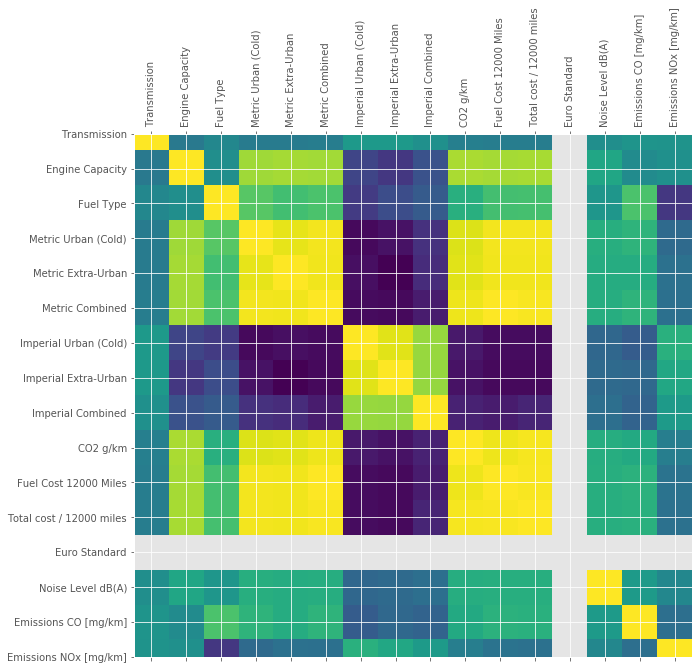

In [438]:
corr = clean_dataset.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.grid(True)
plt.show()

## Implementing Regression:

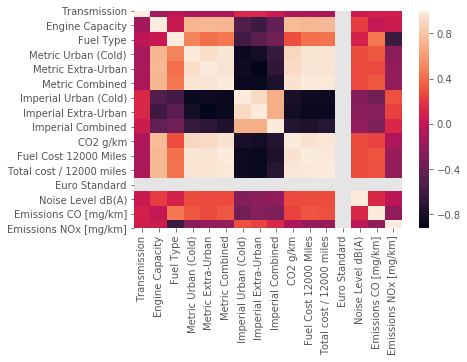

In [439]:
import seaborn as sns
sns.heatmap(corr)

## now we need to seperate the dependant and independent variables

In [442]:
clean_dataset

,Transmission,Engine Capacity,Fuel Type,Metric Urban (Cold),Metric Extra-Urban,Metric Combined,Imperial Urban (Cold),Imperial Extra-Urban,Imperial Combined,CO2 g/km,Fuel Cost 12000 Miles,Total cost / 12000 miles,Euro Standard,Noise Level dB(A),Emissions CO [mg/km],Emissions NOx [mg/km]
0,29,1248.0,0,4.3,2.9,3.4,65.7,97.4,83.1,89,807.0,807.0,6,67.5,234.0,67.0
1,31,1496.0,0,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,807.0,6,68.0,119.0,37.0
2,31,1496.0,0,3.9,3.1,3.4,72.4,91.1,83.1,89,807.0,807.0,6,68.0,119.0,37.0
3,29,1560.0,0,3.7,3.1,3.3,76.3,91.1,85.6,86,784.0,784.0,6,68.8,272.0,55.0
4,20,1560.0,0,3.9,3.2,3.4,72.4,88.3,83.1,89,807.0,807.0,6,69.2,185.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5113,28,3456.0,7,7.3,6.0,6.5,38.7,47.1,43.5,148,1505.0,1505.0,6,67.0,283.0,5.0
5114,28,3456.0,7,7.3,6.0,6.5,38.7,47.1,43.5,148,1505.0,1505.0,6,67.0,283.0,5.0
5115,13,3498.0,7,9.6,5.3,6.8,29.4,53.3,41.5,159,1577.0,1577.0,6,69.0,207.0,27.0
5116,28,1998.0,7,9.6,5.9,7.3,29.4,47.9,38.7,168,1692.0,1692.0,6,70.0,278.0,58.0


In [506]:
#features_matrix = clean_dataset.drop('Emissions CO [mg/km]', axis=1)
features_matrix = clean_dataset[['Imperial Extra-Urban']]
goal_vector = clean_dataset['Emissions CO [mg/km]']

### We replaced the data with numbers that do the same job, as for the model it doesn't matter if it's called AMT6 or 1 for example yet, the model might think that some Transmission has larger value than the other, and this might cause us some mistaken calculations ! a good way to handle such case, is to use the one hot encoder Now let's have our data encoded in a dummy variables, so we no longer have the problem of one country or(category) taking a higher value than the other


In [507]:
# # import the oneHotEncoder class
# from sklearn.preprocessing import OneHotEncoder
# oneHotEncoder = OneHotEncoder(categorical_features=[0])
# features_matrix = oneHotEncoder.fit_transform(features_matrix)
# features_matrix

In [508]:
# import the modules 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_matrix, goal_vector, test_size = 0.2, random_state = 0)

In [509]:
x_train

,Imperial Extra-Urban
4104,54.300000
3174,55.400000
2240,57.600000
57,88.300000
2150,55.400000
...,...
4931,26.900000
3264,65.700000
1653,64.200000
2607,61.687314


In [510]:
#fitting mulitiple linear re3grission model to TRAINNING set:
from sklearn.linear_model import LinearRegression
#create opbject of linear regression model
model_fit = LinearRegression()
model_fit.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [511]:
# predicting the test set result
y_pred = model_fit.predict(x_test)
y_pred

array([164.39977551, 295.7592422 , 272.19700602, ..., 233.90837223,
       248.34024189, 303.12244101])

### Some Extra Information

In [512]:
#calculate coeffieant
print(model_fit.coef_)

[-2.94527952]


In [513]:
#calculate the interpet
print(model_fit.intercept_)

441.84510650382776


## R Square Value

In [514]:
#evaluating R sequare value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)#r2_score is getting the diffrence between y_test(the acual result) and y_predict

0.08949844350083214

# Our first simple model of Linear Regression of Emission CO prediction

In [515]:
compare = pd.DataFrame({'Prediction': y_pred, 'Test Data' : y_test})
compare.head(10)

,Prediction,Test Data
42,164.399776,141.0
2367,295.759242,215.0
1852,272.197006,130.0
2647,260.158724,108.0
1262,261.004944,285.0
2337,284.861708,150.0
4451,300.766217,700.0
3660,272.197006,594.0
2838,233.908372,190.0
1593,248.340242,81.0


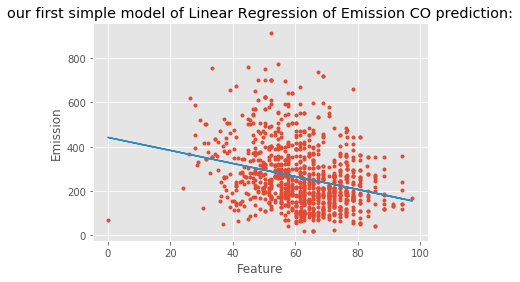

In [517]:
plt.plot(x_test, y_test,'.', x_test, y_pred, '-')
plt.title('our first simple model of Linear Regression of Emission CO prediction:')
plt.xlabel('Feature')
plt.ylabel('Emission')
plt.show()